In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from scipy import stats

pd.set_option('display.max_columns', None)

emp_data = pd.read_csv('/Users/ajarbuckle/Desktop/Attrition Project/Original Data/attrition.csv')
emp_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [2]:
emp_data['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [3]:
emp_data['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [4]:
emp_data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [5]:
# Getting rid of columns that don't contribute meaningfully to the model 
# 'EmployeeCount', 'StandardHours', and 'Over18' have the same value for every employee
# and 'EmployeeNumber' obviously shouldn't make a difference as to whether an employee leaves 

emp_data.drop(columns = {'EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'}, inplace = True)
emp_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [6]:
# Checking datatypes 

emp_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [7]:
# One-hot encoding non-ordinal string / categorical columns 

emp_data = pd.get_dummies(emp_data, columns=['Department'])
emp_data = pd.get_dummies(emp_data, columns=['EducationField'])
emp_data = pd.get_dummies(emp_data, columns=['Gender'])
emp_data = pd.get_dummies(emp_data, columns=['JobRole'])
emp_data = pd.get_dummies(emp_data, columns=['MaritalStatus'])
emp_data = pd.get_dummies(emp_data, columns=['OverTime'])

emp_data

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,Yes,Travel_Rarely,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,No,Travel_Frequently,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,Yes,Travel_Rarely,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,No,Travel_Frequently,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,No,Travel_Rarely,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,23,2,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1466,39,No,Travel_Rarely,613,6,1,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1467,27,No,Travel_Rarely,155,4,3,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1468,49,No,Travel_Frequently,1023,2,3,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [8]:
# Mapping ordinal string / categorical columns to numerical values based on order 

ordinal_mapping = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
emp_data['BusinessTravel'] = emp_data['BusinessTravel'].map(ordinal_mapping)
emp_data

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,Yes,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,No,2,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,Yes,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,No,2,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,No,1,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,2,884,23,2,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1466,39,No,1,613,6,1,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1467,27,No,1,155,4,3,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1468,49,No,2,1023,2,3,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [9]:
# Encoding 'Attrition' values as 0's and 1's 

emp_data['Attrition'] = emp_data['Attrition'].map({'Yes': 1, 'No': 0})
emp_data

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,0,2,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,0,2,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,0,1,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,23,2,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1466,39,0,1,613,6,1,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1467,27,0,1,155,4,3,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1468,49,0,2,1023,2,3,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [10]:
# Standardizing the numerical columns 

scaler = StandardScaler()

emp_data[['Age']] = scaler.fit_transform(emp_data[['Age']])
emp_data[['DailyRate']] = scaler.fit_transform(emp_data[['DailyRate']])
emp_data[['DistanceFromHome']] = scaler.fit_transform(emp_data[['DistanceFromHome']])
emp_data[['HourlyRate']] = scaler.fit_transform(emp_data[['HourlyRate']])
emp_data[['MonthlyIncome']] = scaler.fit_transform(emp_data[['MonthlyIncome']])
emp_data[['MonthlyRate']] = scaler.fit_transform(emp_data[['MonthlyRate']])
emp_data[['NumCompaniesWorked']] = scaler.fit_transform(emp_data[['NumCompaniesWorked']])
emp_data[['PercentSalaryHike']] = scaler.fit_transform(emp_data[['PercentSalaryHike']])
emp_data[['TotalWorkingYears']] = scaler.fit_transform(emp_data[['TotalWorkingYears']])
emp_data[['TrainingTimesLastYear']] = scaler.fit_transform(emp_data[['TrainingTimesLastYear']])
emp_data[['YearsAtCompany']] = scaler.fit_transform(emp_data[['YearsAtCompany']])
emp_data[['YearsInCurrentRole']] = scaler.fit_transform(emp_data[['YearsInCurrentRole']])
emp_data[['YearsSinceLastPromotion']] = scaler.fit_transform(emp_data[['YearsSinceLastPromotion']])
emp_data[['YearsWithCurrManager']] = scaler.fit_transform(emp_data[['YearsWithCurrManager']])

emp_data

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.446350,1,1,0.742527,-1.010909,2,2,1.383138,3,2,4,-0.108350,0.726020,2.125136,-1.150554,3,1,0,-0.421642,-2.171982,1,-0.164613,-0.063296,-0.679146,0.245834,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,1.322365,0,2,-1.297775,-0.147150,1,3,-0.240677,2,2,2,-0.291719,1.488876,-0.678049,2.129306,4,4,1,-0.164511,0.155707,3,0.488508,0.764998,-0.368715,0.806541,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0.008343,1,1,1.414363,-0.887515,2,4,1.284725,2,1,3,-0.937654,-1.674841,1.324226,-0.057267,3,2,0,-0.550208,0.155707,3,-1.144294,-1.167687,-0.679146,-1.155935,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,-0.429664,0,2,1.461466,-0.764121,4,4,-0.486709,3,1,3,-0.763634,1.243211,-0.678049,-1.150554,3,3,0,-0.421642,0.155707,3,0.161947,0.764998,0.252146,-1.155935,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,-1.086676,0,1,-0.524295,-0.887515,1,1,-1.274014,3,1,2,-0.644858,0.325900,2.525591,-0.877232,3,4,1,-0.678774,0.155707,3,-0.817734,-0.615492,-0.058285,-0.595227,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0,2,0.202082,1.703764,2,3,-1.224807,4,2,4,-0.835451,-0.284329,0.523316,0.489376,3,3,1,0.735447,0.155707,3,-0.327893,-0.615492,-0.679146,-0.314873,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1466,0.227347,0,1,-0.469754,-0.393938,1,4,-1.175601,2,3,1,0.741140,1.004010,0.523316,-0.057267,3,1,1,-0.293077,1.707500,3,-0.001333,0.764998,-0.368715,0.806541,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1467,-1.086676,0,1,-1.605183,-0.640727,3,2,1.038693,4,2,2,-0.076690,-1.284418,-0.678049,1.309341,4,2,1,-0.678774,-2.171982,3,-0.164613,-0.615492,-0.679146,-0.314873,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1468,1.322365,0,2,0.546677,-0.887515,3,4,-0.142264,2,2,2,-0.236474,-0.150393,-0.277594,-0.330589,3,4,0,0.735447,0.155707,2,0.325228,0.488900,-0.679146,1.086895,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [11]:
# Checking whether there are NA values throughout the dataset

print('NA values in dataset: ', emp_data[emp_data.isna().any(axis=1)].shape[0])

NA values in dataset:  0


In [12]:
# Splitting the dataset into predictors (x) and target (y)

x = emp_data.drop(columns=['Attrition'])
y = emp_data['Attrition']

In [13]:
# Splitting the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [14]:
# Creating and training the logistic regression model

model = LogisticRegression(max_iter = 1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
# Generating predictions

y_pred = model.predict(x_test)

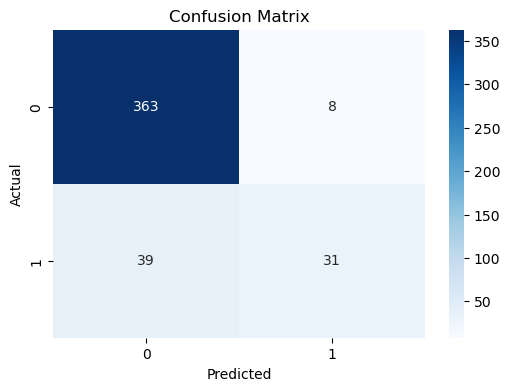

In [16]:
# Creating and visualizing a confusion matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Evaluating model by calculating precision and recall 

# Retrieving values for true negative, false negative, false positive, and true positive
tn = cm[0,0]
fn = cm[1,0]
fp = cm[0,1]
tp = cm[1,1]

# Computing evaluation metrics 
accuracy = (tn + tp) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Model Accuracy: {accuracy * 100:.2f}%')
print(f'Model Precision: {precision * 100:.2f}%')
print(f'Model Sensitivity: {sensitivity * 100:.2f}%')
print(f'Model Specificity: {specificity * 100:.2f}%')

Model Accuracy: 89.34%
Model Precision: 79.49%
Model Sensitivity: 44.29%
Model Specificity: 97.84%


In [19]:
# Examining feature importance 

# Getting the coefficients for our features and our feature names, then putting them together in a dataframe 
coefficients = model.coef_[0] 
feature_names = x.columns.tolist()
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Calculating the absolute value of coefficients to be able to compare the positive and negative ones with each other
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])

# Displaying the coefficient dataframe sorted in descending order of absolute value of coefficient  
coef_df.sort_values(by='Abs_Coefficient', ascending=False, inplace=True) 
coef_df

,Feature,Coefficient,Abs_Coefficient
47,OverTime_No,-0.907279,0.907279
48,OverTime_Yes,0.905342,0.905342
43,JobRole_Sales Representative,0.839384,0.839384
1,BusinessTravel,0.796774,0.796774
30,EducationField_Medical,-0.737107,0.737107
37,JobRole_Laboratory Technician,0.664465,0.664465
27,EducationField_Human Resources,0.625198,0.625198
20,YearsAtCompany,0.585588,0.585588
22,YearsSinceLastPromotion,0.564000,0.564000
21,YearsInCurrentRole,-0.557479,0.557479


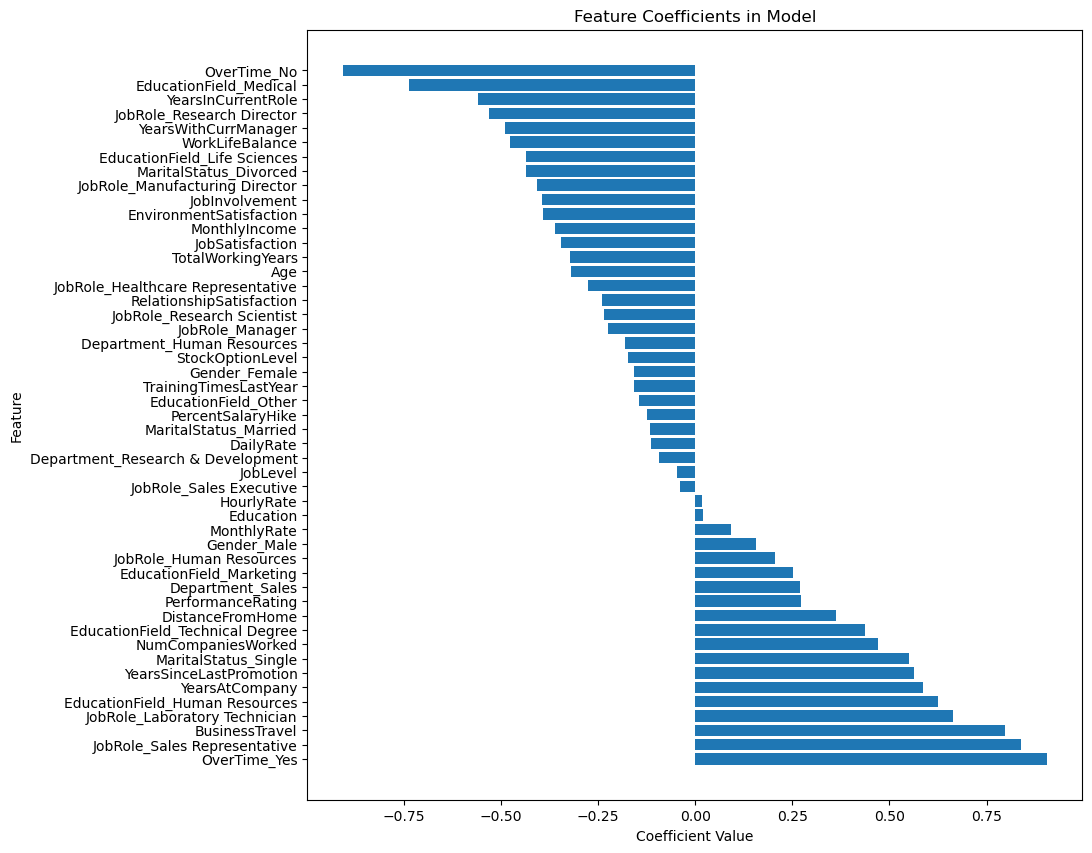

In [21]:
# Visualizing the coefficients 

# Re-ordering the coefficient dataframe by coefficient value to mak the visualization easier to interpret 
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True) 

plt.figure(figsize=(10, 10))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients in Model')
plt.show()

In [22]:
# Seeing which feature coefficients are statistically significant 

# Calculating the standard errors of the coefficients
std_err = np.std(x_train, 0)
# Calculating the z-scores of each feature's coefficient
z_scores = model.coef_[0] / std_err
# Calculating the p-values of each feature's coefficient
p_values = [2 * (1 - stats.norm.cdf(np.abs(z))) for z in z_scores]

# Putting the feature names and their associated p-values together in a dataframe
p_value_list = list(zip(feature_names, p_values))
p_value_df = pd.DataFrame(p_value_list, columns=['Feature', 'p-value'])

# Displaying the p-value dataframe sorted in ascending order of p-value 
p_value_df.sort_values(by = 'p-value', ascending = True)

,Feature,p-value
27,EducationField_Human Resources,0.000010
43,JobRole_Sales Representative,0.000215
40,JobRole_Research Director,0.022405
47,OverTime_No,0.041942
48,OverTime_Yes,0.042382
37,JobRole_Laboratory Technician,0.076954
30,EducationField_Medical,0.111908
32,EducationField_Technical Degree,0.126954
1,BusinessTravel,0.133932
39,JobRole_Manufacturing Director,0.157928


In [23]:
# Joining the p-value table with the coefficient table, then filtering it down to only the statistically significant features 

complete_df = pd.merge(coef_df, p_value_df, on='Feature')
complete_df = complete_df[complete_df['p-value'] < 0.05]
complete_df.sort_values(by = 'Abs_Coefficient', ascending = False) 

,Feature,Coefficient,Abs_Coefficient,p-value
48,OverTime_No,-0.907279,0.907279,0.041942
0,OverTime_Yes,0.905342,0.905342,0.042382
1,JobRole_Sales Representative,0.839384,0.839384,0.000215
4,EducationField_Human Resources,0.625198,0.625198,0.000010
45,JobRole_Research Director,-0.530867,0.530867,0.022405
